In [518]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import seaborn as sns

In [519]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [520]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [521]:
train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [522]:
train.drop(['id'],axis=1,inplace=True)

In [523]:
train.shape

(90615, 9)

In [524]:
train.corr()

C:\Users\pasargad\AppData\Local\Temp\ipykernel_12168\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
Length,1.000000,0.989732,0.916094,0.931449,0.909609,0.913134,0.911073,0.623786
Diameter,0.989732,1.000000,0.919618,0.933848,0.908466,0.914668,0.917871,0.636832
Height,0.916094,0.919618,1.000000,0.902344,0.861769,0.886132,0.904019,0.665772
Whole weight,0.931449,0.933848,0.902344,1.000000,0.971249,0.974319,0.964201,0.617274
Whole weight.1,0.909609,0.908466,0.861769,0.971249,1.000000,0.949227,0.911800,0.515067
Whole weight.2,0.913134,0.914668,0.886132,0.974319,0.949227,1.000000,0.937069,0.588954
Shell weight,0.911073,0.917871,0.904019,0.964201,0.911800,0.937069,1.000000,0.694766
Rings,0.623786,0.636832,0.665772,0.617274,0.515067,0.588954,0.694766,1.000000


In [525]:
train.shape

(90615, 9)

In [526]:
train.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [527]:
Ohot=OneHotEncoder(sparse_output=False)

object_column_train=train.select_dtypes(exclude=['float','int']).columns
object_column_test=test.select_dtypes(exclude=['int','float']).columns

train_encoded=Ohot.fit_transform(train[object_column_train])
test_encoded=Ohot.transform(test[object_column_test])

ohot_train_df=pd.DataFrame(train_encoded,columns=Ohot.get_feature_names_out(object_column_train))
ohot_test_df=pd.DataFrame(test_encoded,columns=Ohot.get_feature_names_out(object_column_test))

train=pd.concat([train,ohot_train_df],axis=1)
test=pd.concat([test,ohot_test_df],axis=1)

train.drop(object_column_train,axis=1,inplace=True)
test.drop(object_column_test,axis=1,inplace=True)

In [528]:
train.head()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,1.0,0.0,0.0
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,1.0,0.0,0.0
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,0.0,1.0,0.0
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,0.0,0.0,1.0
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,0.0,1.0,0.0


In [529]:
# Calculate IQR
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
threshold = 1.8

# Find outliers
outliers = ((train < (Q1 - threshold * IQR)) | (train > (Q3 + threshold * IQR))).any(axis=1)

print("Summary statistics before outlier removal:\n", train.shape)

# Remove outliers
train = train[~outliers]

# Check summary statistics before and after outlier removal
print("Summary statistics after outlier removal:\n", train.shape)




Summary statistics before outlier removal:
 (90615, 11)
Summary statistics after outlier removal:
 (85700, 11)


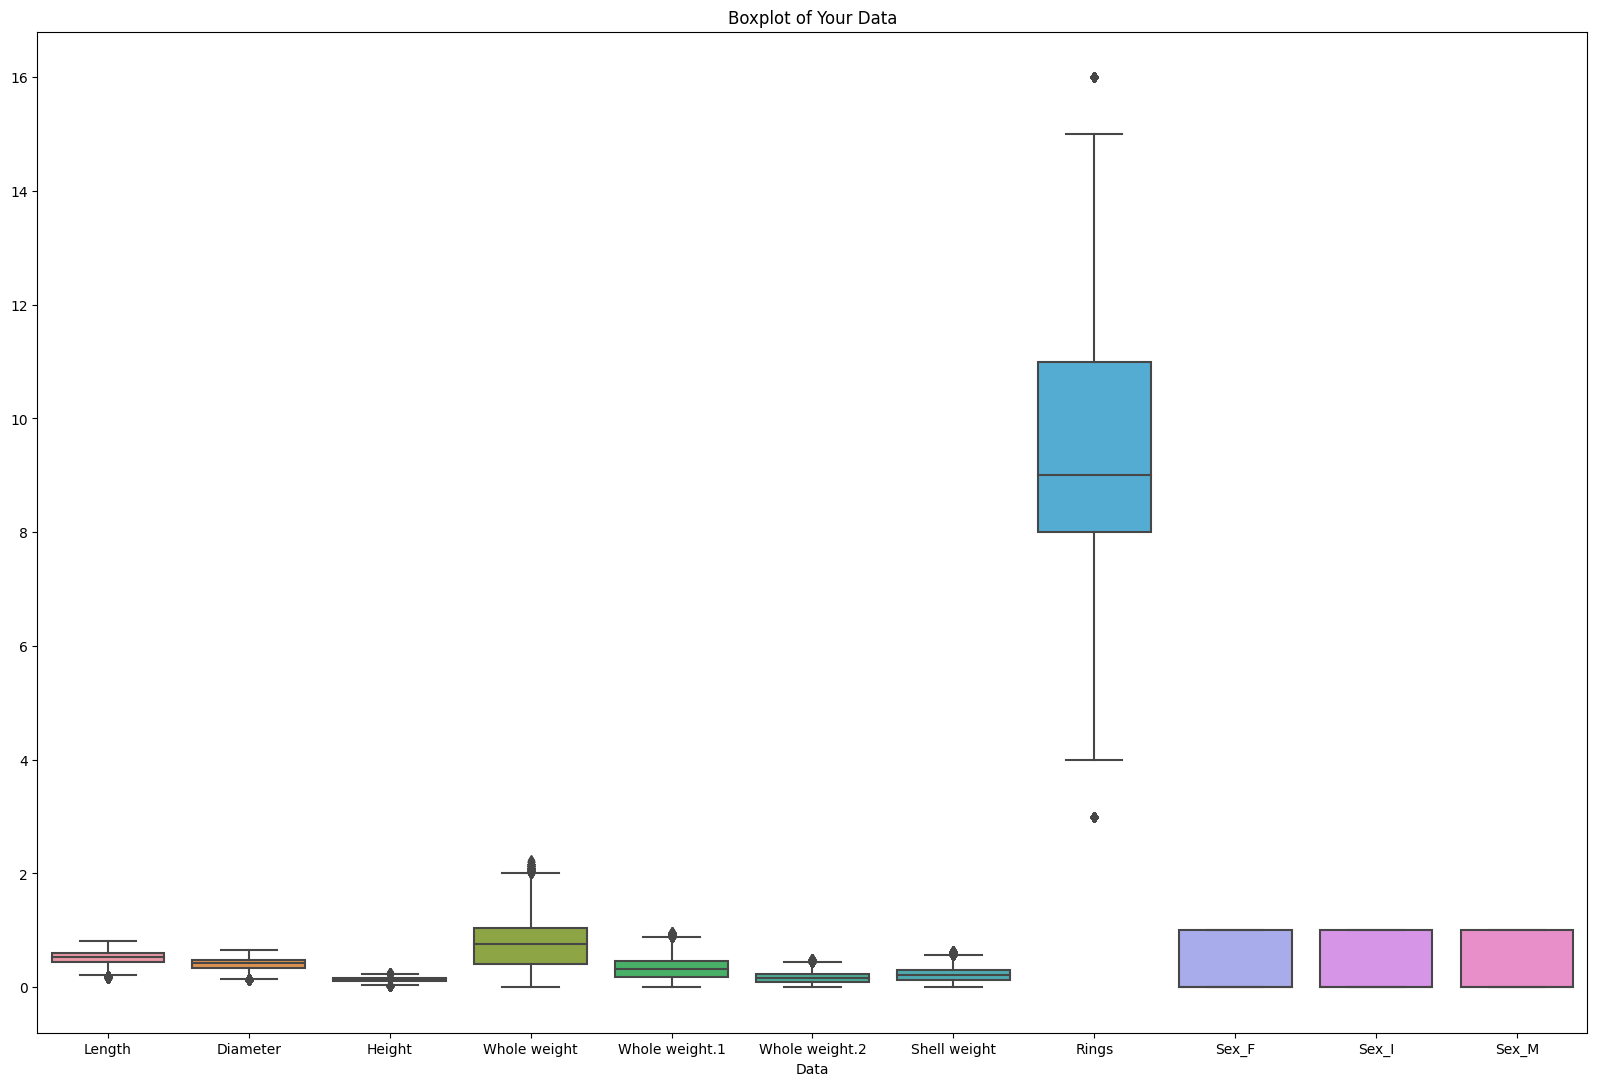

In [530]:
plt.figure(figsize=(20, 13))
sns.boxplot(data=train)
plt.xlabel('Data')
plt.title('Boxplot of Your Data')
plt.show()

In [531]:
scaler=MinMaxScaler(feature_range=(0,1))

X=train.drop(columns='Rings')
Y=train['Rings']

x_train,x_valid,y_train,y_valid=train_test_split(X,Y,test_size=0.1,random_state=42)

x_train=scaler.fit_transform(x_train)
x_valid=scaler.transform(x_valid)



In [532]:
model=XGBRegressor()

0.7336573462106546
0.6842001782316074


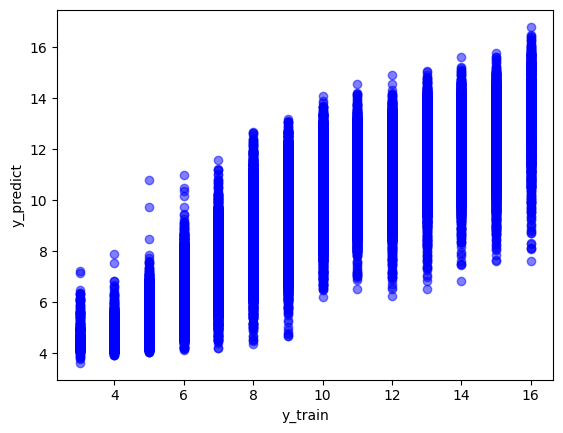

In [533]:
model.fit(x_train,y_train)

pred_trainY=model.predict(x_train)
pred_validY=model.predict(x_valid)

plt.scatter(y_train,pred_trainY,color='blue',alpha=0.5)
plt.xlabel('y_train')
plt.ylabel('y_predict')

r_train=r2_score(y_train,pred_trainY)
r_valid=r2_score(y_valid,pred_validY)

print(r_train)
print(r_valid)


